In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv',converters={'first_transaction_time':str},encoding = 'gbk')

In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,5,10,12,13,14
custid,2791858,534047,2849787,1809708,2499829
trade_no,20180507115231274000000023057383,20180507121002192000000023073000,20180507125159718000000023114911,20180507121358683000000388283484,20180507115448545000000388205844
bank_card_no,卡号1,卡号1,卡号1,卡号1,卡号1
low_volume_percent,0.01,0.02,0.04,0,0.01
middle_volume_percent,0.99,0.94,0.96,0.96,0.99
take_amount_in_later_12_month_highest,0,2000,0,2000,0
trans_amount_increase_rate_lately,0.9,1.28,1,0.13,0.46
trans_activity_month,0.55,1,1,0.57,1
trans_activity_day,0.313,0.458,0.114,0.777,0.175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [5]:
df.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

## 一、可视化各特征，看看数据分布特点。

In [6]:
name_list_1 = [
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time'
       ]
name_list_2 = [
       'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       ]
name_list_3 = [
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'max_consume_count_later_6_month',
       'railway_consume_count_last_12_month',
       'pawns_auctions_trusts_consume_last_1_month',
       'pawns_auctions_trusts_consume_last_6_month',
       'jewelry_consume_count_last_6_month', 
       'first_transaction_day', 'trans_day_last_12_month', 'apply_score',
       'apply_credibility', 'query_org_count',
       ]
name_list_4 = [
      'query_finance_count', 'query_cash_count', 'query_sum_count',
       'latest_query_time', 'latest_one_month_apply',
       'latest_three_month_apply', 'latest_six_month_apply', 'loans_score',
       'loans_credibility_behavior', 'loans_count', 'loans_settle_count',
       'loans_overdue_count', 'loans_org_count_behavior',
       'consfin_org_count_behavior', 'loans_cash_count',
       ]
name_list_5 = [
      'latest_one_month_loan', 'latest_three_month_loan',
       'latest_six_month_loan', 'history_suc_fee', 'history_fail_fee',
       'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time',
       'loans_latest_time', 'loans_credit_limit', 'loans_credibility_limit',
       'loans_org_count_current', 'loans_product_count', 'loans_max_limit',
       'loans_avg_limit',
       ]
name_list_6 = [
      'consfin_credit_limit', 'consfin_credibility',
       'consfin_org_count_current', 'consfin_product_count',
       'consfin_max_limit', 'consfin_avg_limit', 'latest_query_day',
       'loans_latest_day'
       ]

In [7]:
print(len(name_list_1))
print(len(name_list_2))
print(len(name_list_3))
print(len(name_list_4))
print(len(name_list_5))
print(len(name_list_6))

15
15
15
15
15
8


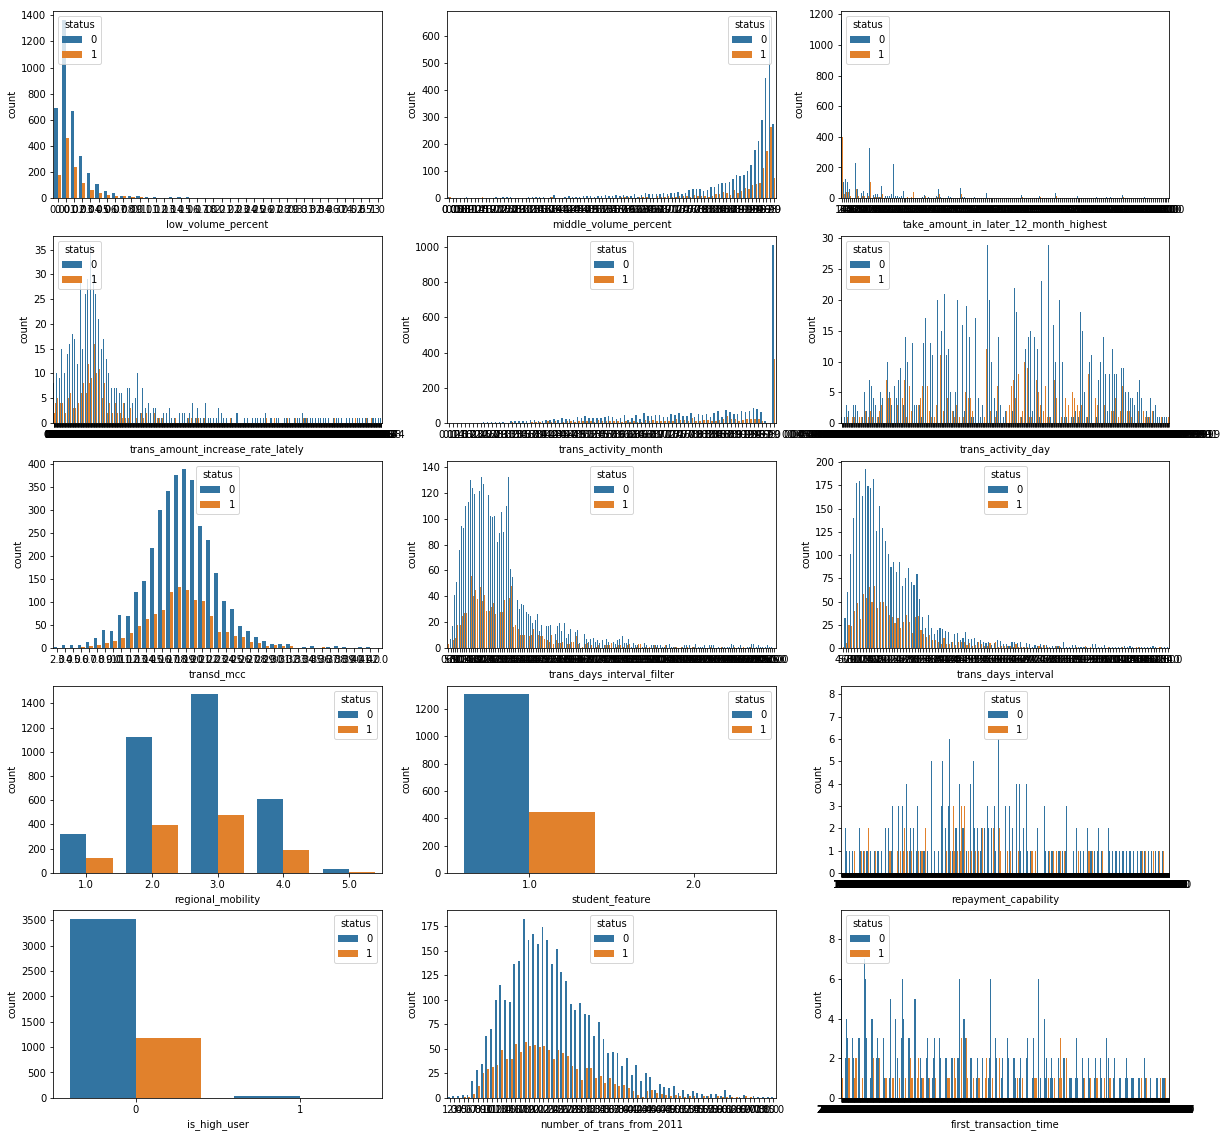

In [8]:
f, ax = plt.subplots(5, 3, figsize=(20, 20))

for i,name in enumerate(name_list_1):     
    sns.countplot(data=df, x=name, hue='status',  ax=ax[i // 3][i % 3])
plt.show()

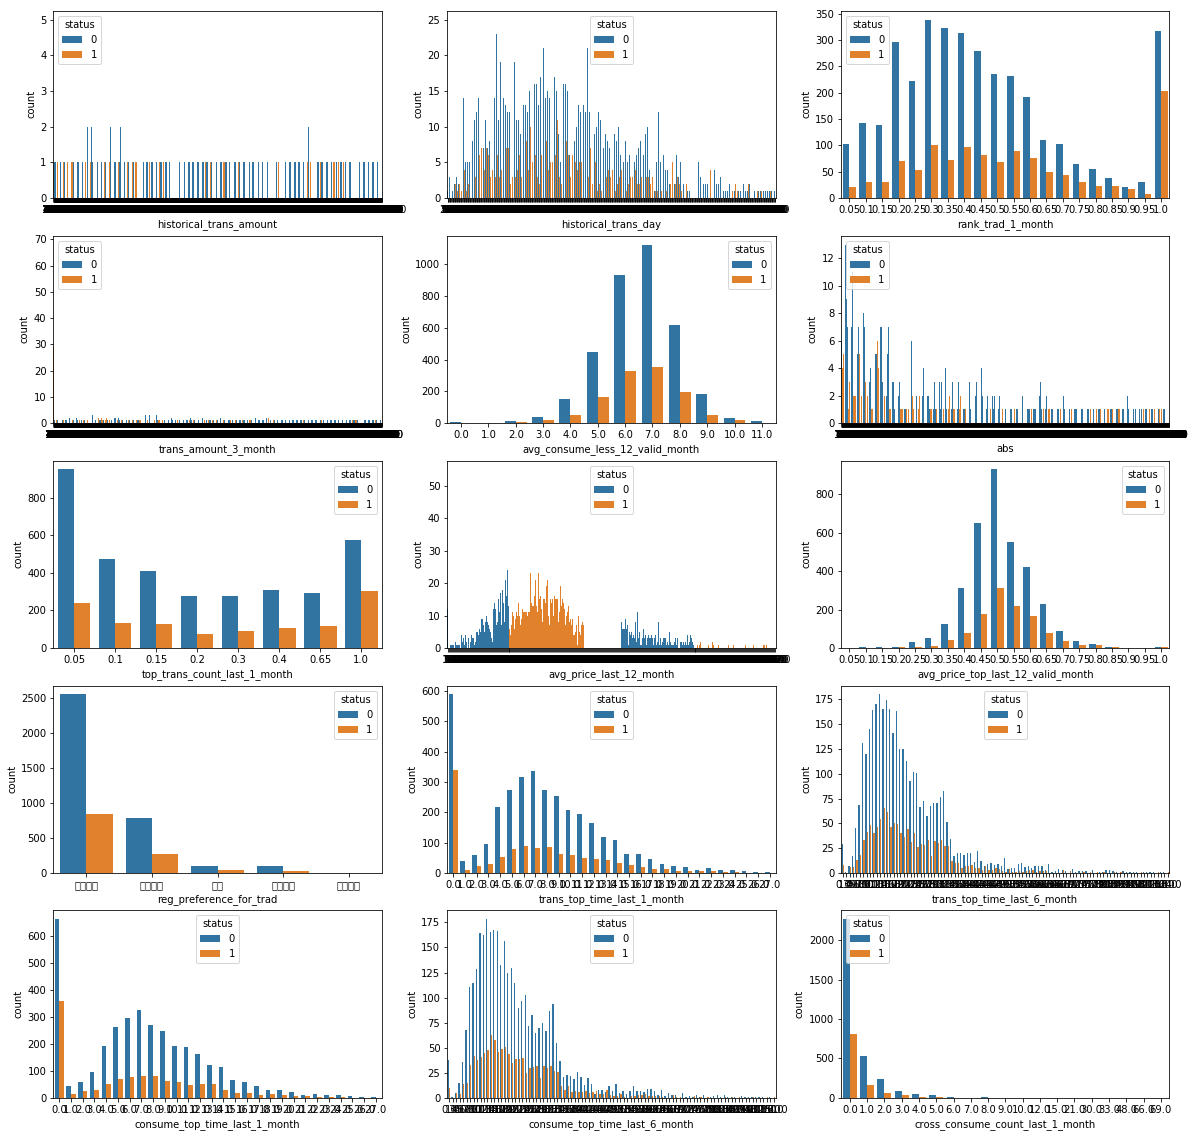

In [9]:
f, ax = plt.subplots(5, 3, figsize=(20, 20))

for i,name in enumerate(name_list_2):     
    sns.countplot(data=df, x=name, hue='status',  ax=ax[i // 3][i % 3])
plt.show()

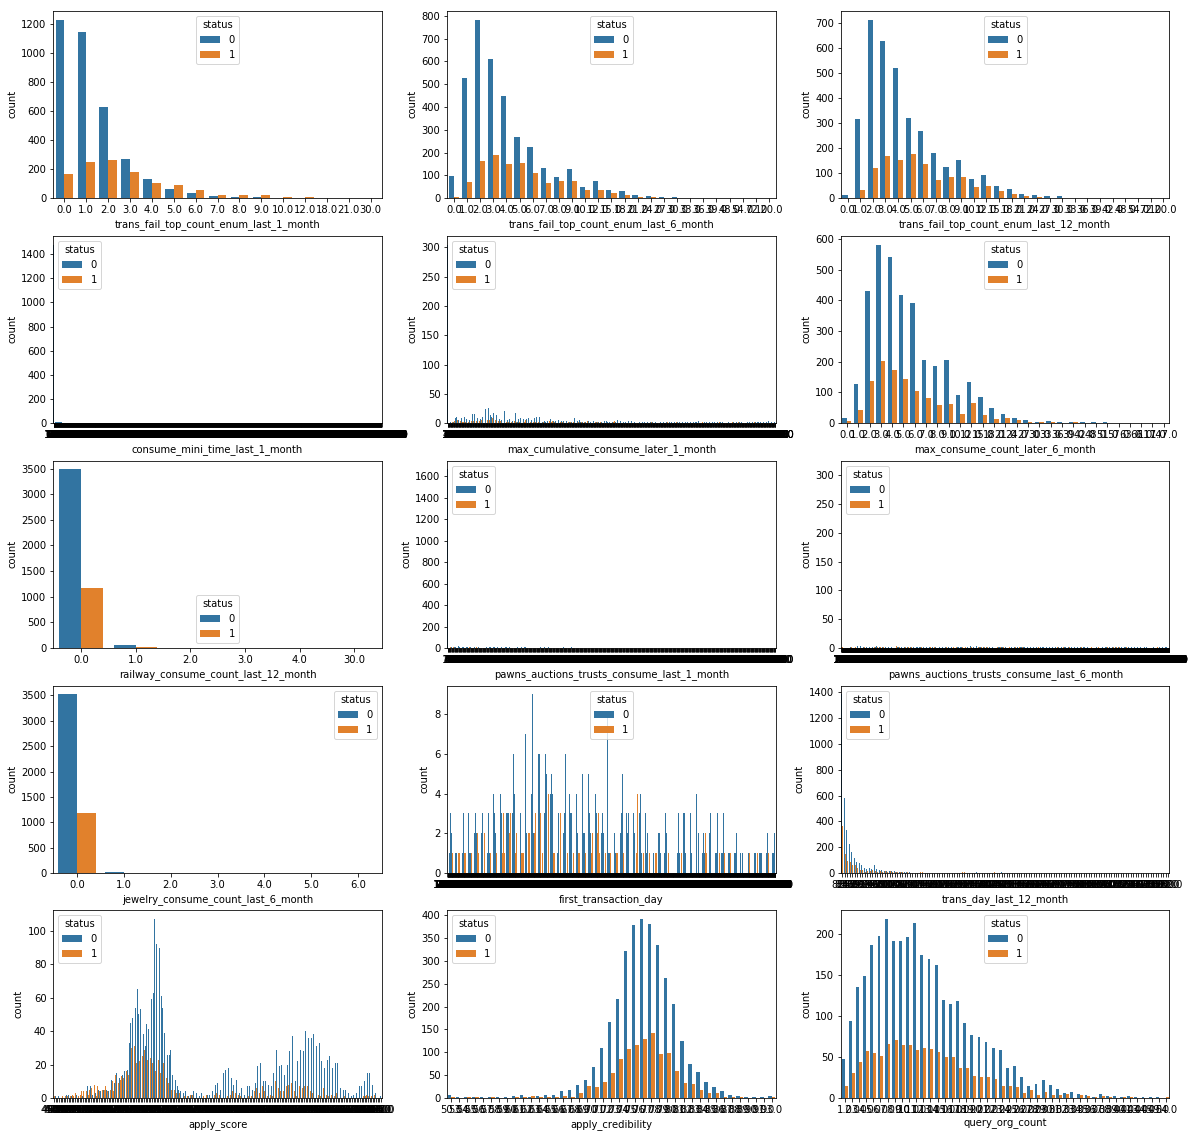

In [10]:
f, ax = plt.subplots(5, 3, figsize=(20, 20))

for i,name in enumerate(name_list_3):     
    sns.countplot(data=df, x=name, hue='status',  ax=ax[i // 3][i % 3])
plt.show()

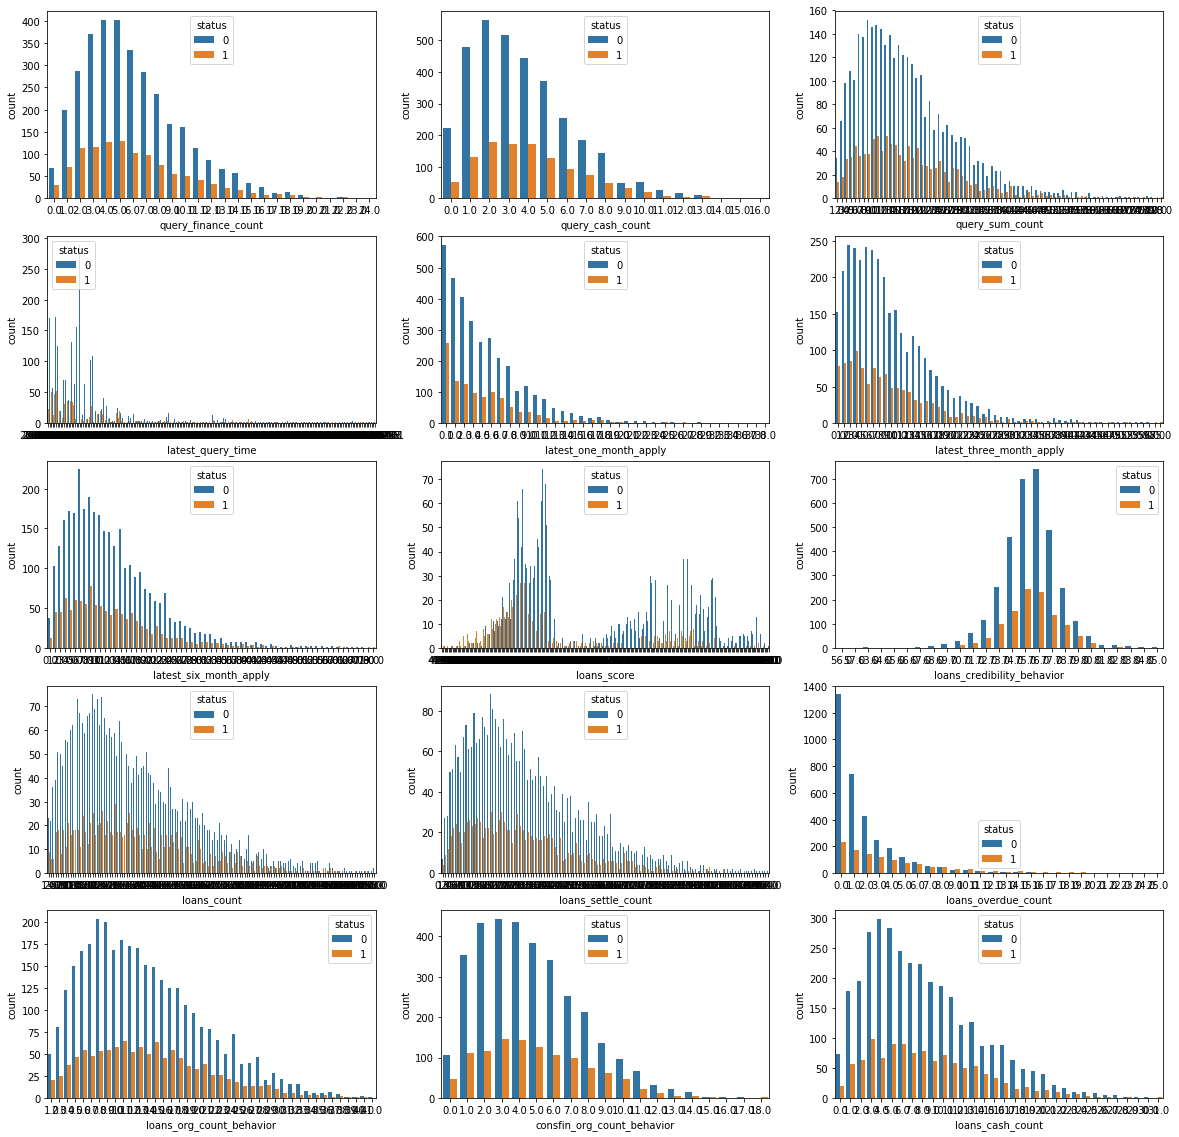

In [11]:
f, ax = plt.subplots(5, 3, figsize=(20, 20))

for i,name in enumerate(name_list_4):     
    sns.countplot(data=df, x=name, hue='status',  ax=ax[i // 3][i % 3])
plt.show()

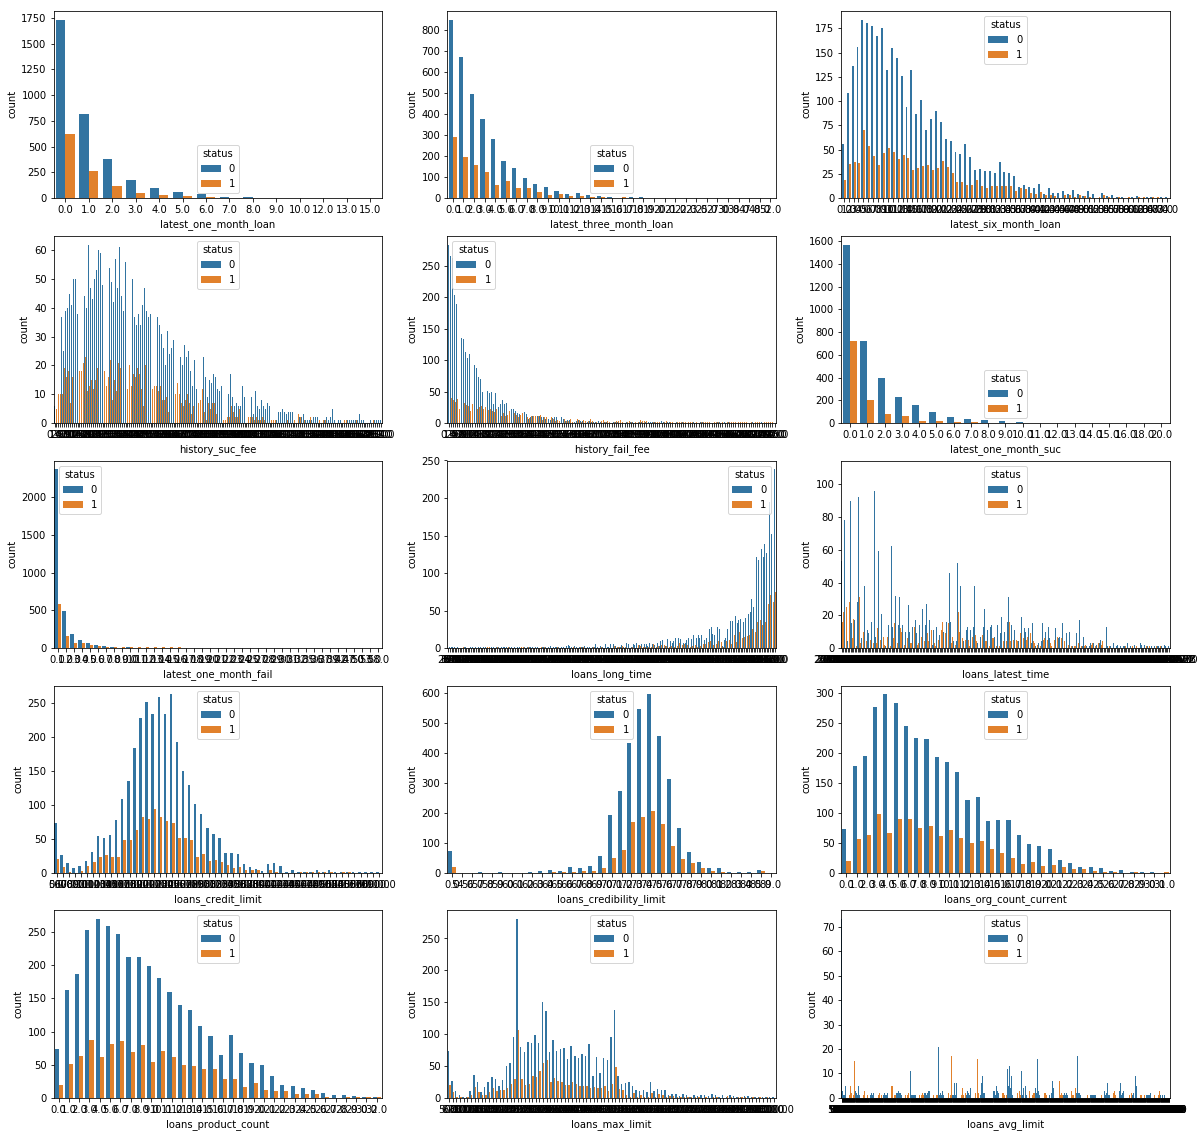

In [12]:
f, ax = plt.subplots(5, 3, figsize=(20, 20))

for i,name in enumerate(name_list_5):     
    sns.countplot(data=df, x=name, hue='status',  ax=ax[i // 3][i % 3])
plt.show()

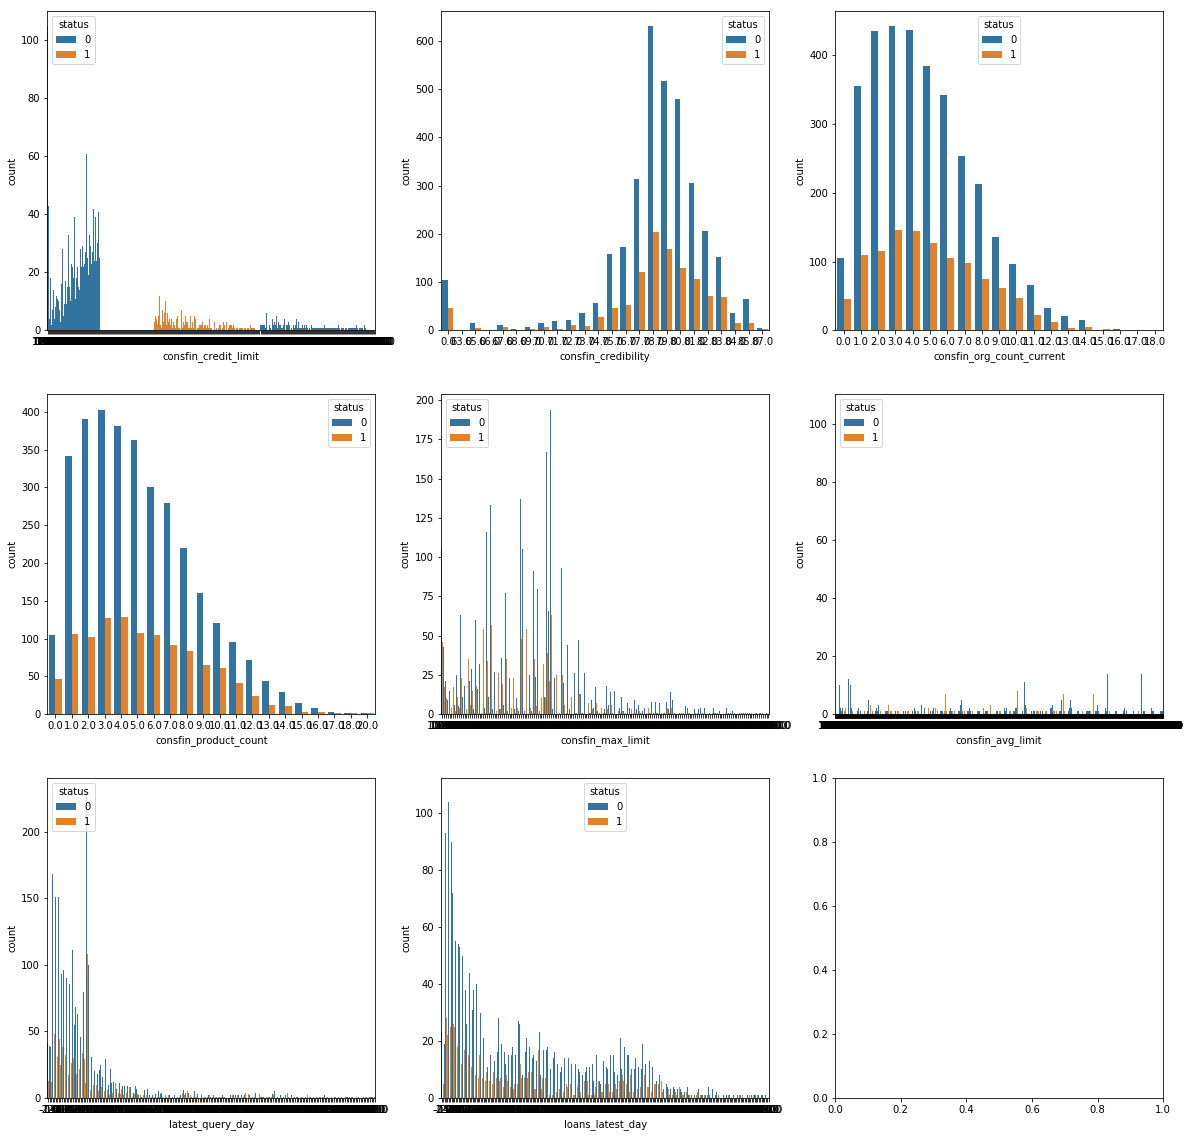

In [13]:
f, ax = plt.subplots(3, 3, figsize=(20, 20))

for i,name in enumerate(name_list_6):     
    sns.countplot(data=df, x=name, hue='status',  ax=ax[i // 3][i % 3])
plt.show()

      从以上分布图可以看出，连续型数据的特征基本上符合正态分布，指数分布或者泊松分布等，但在['rank_trad_1_month','trans_top_time_last_1_month','trans_top_time_last_6_month','consume_top_time_last_1_month','consume_top_time_last_6_month','loans_credit_limit','loans_credibility_limit','loans_max_limit','consfin_credibility']这几个特征上出现数据于最左最右位置会出现骤升。从业务层面考虑，暂时未得出满意结论，待确认特征取数逻辑后再分析。
      还有，'avg_price_last_12_month','consfin_credit_limit'这两个特征虽然是连续型特征，但由图上看，出现标签分段，考虑继续探索，查看是否存在分段。
 
      另外几个离散型特征，如'reg_preference_for_trad','regional_mobility'等，在标签status上区别明显，感觉是对模型有用的特征。
      

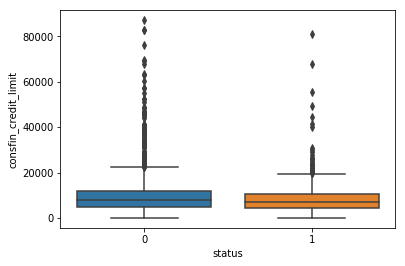

In [154]:
sns.boxplot(y = 'consfin_credit_limit',x = 'status',data = df)

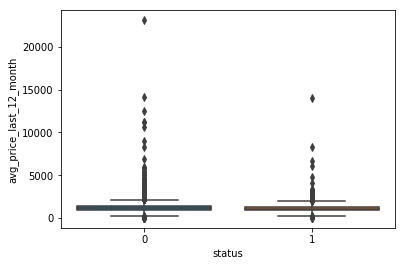

In [155]:
sns.boxplot(y = 'avg_price_last_12_month',x = 'status',data = df)

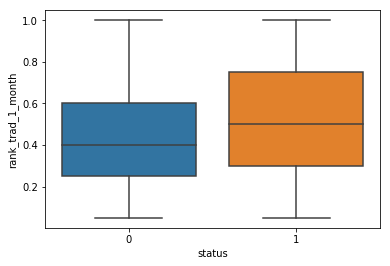

In [156]:
sns.boxplot(y = 'rank_trad_1_month',x = 'status',data = df)

## 二、时间序列特征探索

特征中发现 'trade_no','loans_latest_time','loans_latest_day','first_transaction_day','first_transaction_time','latest_query_time','latest_query_day'在时间上存在联系，这里做下数据探索。                           

In [45]:
from dateutil.parser import parse

In [77]:
df[df.first_transaction_day.isnull()].T

,2703,3740
Unnamed: 0,6760,9453
custid,2346029,2123079
trade_no,20180507122903344000000023090358,20180507123543218000000023096586
bank_card_no,卡号1,卡号1
low_volume_percent,NaN,NaN
middle_volume_percent,NaN,NaN
take_amount_in_later_12_month_highest,0,0
trans_amount_increase_rate_lately,NaN,NaN
trans_activity_month,NaN,NaN
trans_activity_day,NaN,NaN


In [120]:
a = df[df.first_transaction_day.notnull()]
a.first_transaction_day = a.first_transaction_day.astype(int)
a.first_transaction_day = a.first_transaction_day.astype('timedelta64[D]')
a.first_transaction_time = pd.to_datetime(a.first_transaction_time)
a.survey_time = a.first_transaction_time + a.first_transaction_day 
a.survey_time.unique()

array(['2018-05-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [123]:
b = df[df.latest_query_day.notnull()]
b.latest_query_day = b.latest_query_day.astype(int)
b.latest_query_day = b.latest_query_day.astype('timedelta64[D]')
b.latest_query_time = pd.to_datetime(b.latest_query_time)
b.survey_time_trans = b.latest_query_day + b.latest_query_time
b.survey_time_trans.value_counts()

2018-05-07    3434
2018-05-04    1007
2018-05-08       9
dtype: int64

In [127]:
c = df[df.loans_latest_time.notnull()]
c.loans_latest_day = c.loans_latest_day.astype(int)
c.loans_latest_day = c.loans_latest_day.astype('timedelta64[D]')
c.loans_latest_time = pd.to_datetime(c.loans_latest_time)
c.survey_time_loans = c.loans_latest_time + c.loans_latest_day
c.survey_time_loans.value_counts()

2018-05-07    3443
2018-05-04    1005
2018-05-08       9
dtype: int64

In [126]:
df.trans_time = df.trade_no.apply(lambda x : str(x)[:8])
df.trans_time.value_counts()

20180507    3682
20180504    1062
20180508      10
Name: trade_no, dtype: int64

    从上面可看出，'first_transaction_day'所用的是'2018-05-21'这天与'first_transaction_time'的差值；'latest_query_day','loans_latest_day'是取了'trade_no'的前8位订单时间分别与'latest_query_time','loans_latest_time' 的差值。
    考虑将'first_transaction_day'改成统一的计算逻辑，取各自的'trade_no'的前8位订单时间计算差值作为用户的生命周期特征。另外，取'latest_query_day','loans_latest_day'最小值作为活跃期。

## 分析object类型数据